In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Limpio los valores NaN y elimino la columna con código de cliente.

In [3]:
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df.dropna(how='any', inplace= True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)



In [4]:
columns_to_convert = ['Partner', 'Dependents','PhoneService','OnlineSecurity' ,
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling',
                      'Churn']


df[columns_to_convert] = df[columns_to_convert].replace(dict(Yes=1, No=0))


**Transformo las columnas con valores categóricos a valores numéricos.**

In [5]:
categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(data=df, columns= categorical_columns)

df.isnull().values.any()
df.isnull().sum().sum()

0

**Divido el dataset en datos de train/test 70/30**


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)



Estandarizo las columnas numéricas y luego las adhiero de nuevo al dataset.

In [7]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

ss = StandardScaler()
X_train[numerical_columns] = ss.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = ss.fit_transform(X_test[numerical_columns])
#scl = pd.DataFrame(scl, columns=numerical_columns)

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 3404 to 1989
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            4922 non-null   int64  
 1   Partner                                  4922 non-null   int64  
 2   Dependents                               4922 non-null   int64  
 3   tenure                                   4922 non-null   float64
 4   PhoneService                             4922 non-null   int64  
 5   PaperlessBilling                         4922 non-null   int64  
 6   MonthlyCharges                           4922 non-null   float64
 7   TotalCharges                             4922 non-null   float64
 8   gender_Female                            4922 non-null   uint8  
 9   gender_Male                              4922 non-null   uint8  
 10  MultipleLines_No                         4922

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [8]:
from imblearn.over_sampling import SMOTE
np.where(np.isnan(X_train)) 
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7254 non-null   int64  
 1   Partner                                  7254 non-null   int64  
 2   Dependents                               7254 non-null   int64  
 3   tenure                                   7254 non-null   float64
 4   PhoneService                             7254 non-null   int64  
 5   PaperlessBilling                         7254 non-null   int64  
 6   MonthlyCharges                           7254 non-null   float64
 7   TotalCharges                             7254 non-null   float64
 8   gender_Female                            7254 non-null   uint8  
 9   gender_Male                              7254 non-null   uint8  
 10  MultipleLines_No                         7254 no

In [9]:
X_train.shape[1]


35

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import keras

# model = Sequential()
# model.add(Dense(X_train.shape[1]))
# model.add(Dense(70, activation='relu'))
# model.add(Dense(35, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
# model.compile(optimizer=optimizer,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(X_train, y_train,
#                     validation_split=0.10,
#                     batch_size=25, epochs=20)



In [11]:
from sklearn import metrics

# yprednn=model.predict(X_test)
# yprednn=yprednn.round()
# print('Neural Network:\n {}\n'.format(
#     metrics.classification_report(yprednn, y_test)))
# print('Neural Network:\n {}\n'.format(
#     metrics.confusion_matrix(yprednn, y_test)))

In [12]:

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(acc) + 1)

# plt.figure(figsize=(12,8))
# plt.title('Modelo de base')
# plt.plot(epochs, loss)
# plt.plot(epochs, val_loss)
# plt.xticks(ticks=epochs)
# plt.ylabel('Loss')
# plt.legend(['Training loss', 'Validation loss'])

# plt.figure(figsize=(12,8))
# plt.plot(epochs, acc)
# plt.plot(epochs, val_acc)
# plt.xticks(ticks=list(epochs))
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(['Training accuracy', 'Validation accuracy']);



In [13]:
from tensorflow.keras import regularizers


def build_model(input_dim=(35,), layers=[64,64,1], optimizer='rmsprop'):
    # Instanciamos la clase del modelo secuencial
    model = Sequential()
    # Aplanamos los datos de entrada, sabemos que vamos a recibir imágenes
    model.add(Flatten(input_shape=input_dim))
    # Agregamos el resto de las capas con activación ReLU con excepción de la última
    for l in layers[:-1]:
        model.add(Dense(units=l, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
        model.add(Dropout(0.3))
    # Agregamos la última capa con activación softmax
    model.add(Dense(units=layers[-1], activation='sigmoid'))
    # Compilamos el modelo con el optimizador seleccionado
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    # Retornamos el modelo compilado
    return model

In [14]:
from keras import optimizers
layers = [[64, 1],
          [64, 32, 1],
          [128, 128, 1]
         ]
optimizers = [optimizers.Adam(), optimizers.SGD(momentum=0.9, nesterov=True)]

In [15]:
import itertools
combinaciones = list(itertools.product(layers, optimizers))
combinaciones

[([64, 1], <tensorflow.python.keras.optimizer_v2.adam.Adam at 0x7f4d4f3c0f10>),
 ([64, 1],
  <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD at 0x7f4d4f3c05d0>)]

In [16]:
n_splits = 2
batch_size = 32
epochs = 400
verbose = 1

In [17]:
global_history = []

In [18]:
from sklearn import metrics

def make_prediction(X_test, y_test):

    yprednn=model.predict(X_test)
    yprednn=yprednn.round()
    print('Neural Network:\n {}\n'.format(
        metrics.classification_report(yprednn, y_test)))
    print('Neural Network:\n {}\n'.format(
        metrics.confusion_matrix(yprednn, y_test)))

In [19]:
# Importamos KFold para hacer cross-validation
from sklearn.model_selection import KFold

# Instanciamos el objeto KFold
kfold = KFold(n_splits=n_splits, shuffle=False)

# Recorremos las combinaciones y generamos distintos modelos a ensayar
for (layers, optimizer) in combinaciones:
    print('\n\nEnsayando modelo con estructura {} y optimizador {}'.format(layers, optimizer))
    
    # Construimos el modelo
    model = build_model(layers=layers, optimizer=optimizer)
    
    # Guardamos los pesos iniciales para usarlos en cada fold
    model.save_weights('initial_weights.h5')
    
    # Generamos los sets de train y val para ensayar el modelo
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
        
        # Reiniciamos los pesos del modelo
        model.load_weights('initial_weights.h5')
        
        # Lo entrenamos con el split de x_train e y_train correspondiente
        history = model.fit(x=X_train.iloc[train_idx],
                            y=y_train.iloc[train_idx],
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(X_train.iloc[val_idx], y_train.iloc[val_idx]),
                            verbose=verbose
                           )
        
        # Evaluamos en train y en val (estos mismos valores los podemos sacar de history)
        train_loss, train_acc = model.evaluate(X_train.iloc[train_idx], y_train.iloc[train_idx])
        val_loss, val_acc = model.evaluate(X_train.iloc[val_idx], y_train.iloc[val_idx])
        yprednn=model.predict(X_test)
        yprednn=yprednn.round()
        
        # Agregamos esta corrida a la historia global
        global_history.append({'fold':fold, 
                               'layers':layers, 
                               'optimizer':optimizer,
                               'train_loss':train_loss,
                               'train_acc':train_acc,
                               'val_loss':val_loss,
                               'val_acc':val_acc,
                               'history':history,
                               'prediction':yprednn
                              })



Ensayando modelo con estructura [64, 1] y optimizador <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f4d4f3c0f10>
Epoch 1/400
114/114 [==============================] - 0s 4ms/step - loss: 0.7502 - accuracy: 0.7461 - val_loss: 0.9122 - val_accuracy: 0.6391
Epoch 2/400
114/114 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.8326 - val_loss: 0.8332 - val_accuracy: 0.6573
Epoch 3/400
114/114 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.8387 - val_loss: 0.8727 - val_accuracy: 0.6372
Epoch 4/400
114/114 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.8451 - val_loss: 0.7736 - val_accuracy: 0.6620
Epoch 5/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8517 - val_loss: 0.7411 - val_accuracy: 0.6664
Epoch 6/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.8495 - val_loss: 0.7689 - val_accuracy: 0.6498
Epoch 7/400


114/114 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8765 - val_loss: 0.5763 - val_accuracy: 0.7328
Epoch 58/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8790 - val_loss: 0.6474 - val_accuracy: 0.6901
Epoch 59/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8795 - val_loss: 0.7600 - val_accuracy: 0.6441
Epoch 60/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8759 - val_loss: 0.5964 - val_accuracy: 0.7202
Epoch 61/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8768 - val_loss: 0.5981 - val_accuracy: 0.7171
Epoch 62/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8809 - val_loss: 0.6026 - val_accuracy: 0.7133
Epoch 63/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8820 - val_loss: 0.6489 - val_accuracy: 0.6923
Epoch

Epoch 114/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8872 - val_loss: 0.5563 - val_accuracy: 0.7348
Epoch 115/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8900 - val_loss: 0.6097 - val_accuracy: 0.7188
Epoch 116/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8897 - val_loss: 0.5990 - val_accuracy: 0.7226
Epoch 117/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8905 - val_loss: 0.6852 - val_accuracy: 0.6959
Epoch 118/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8886 - val_loss: 0.5456 - val_accuracy: 0.7486
Epoch 119/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8900 - val_loss: 0.5538 - val_accuracy: 0.7428
Epoch 120/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8911 - val_loss: 0.6581 - val_ac

114/114 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8947 - val_loss: 0.6153 - val_accuracy: 0.7141
Epoch 171/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8958 - val_loss: 0.6187 - val_accuracy: 0.7166
Epoch 172/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8944 - val_loss: 0.5394 - val_accuracy: 0.7579
Epoch 173/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8963 - val_loss: 0.6492 - val_accuracy: 0.7204
Epoch 174/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8955 - val_loss: 0.5488 - val_accuracy: 0.7483
Epoch 175/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8941 - val_loss: 0.5732 - val_accuracy: 0.7251
Epoch 176/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8958 - val_loss: 0.5875 - val_accuracy: 0.7315

114/114 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8972 - val_loss: 0.6087 - val_accuracy: 0.7210
Epoch 227/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.9030 - val_loss: 0.5501 - val_accuracy: 0.7474
Epoch 228/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.9021 - val_loss: 0.6016 - val_accuracy: 0.7251
Epoch 229/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.9010 - val_loss: 0.6143 - val_accuracy: 0.7254
Epoch 230/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8988 - val_loss: 0.6559 - val_accuracy: 0.7091
Epoch 231/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8977 - val_loss: 0.5817 - val_accuracy: 0.7334
Epoch 232/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.9049 - val_loss: 0.5874 - val_accuracy: 0.7326

114/114 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9018 - val_loss: 0.5577 - val_accuracy: 0.7433
Epoch 283/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.9065 - val_loss: 0.6007 - val_accuracy: 0.7287
Epoch 284/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.9035 - val_loss: 0.6150 - val_accuracy: 0.7279
Epoch 285/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9035 - val_loss: 0.6515 - val_accuracy: 0.7177
Epoch 286/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.9035 - val_loss: 0.5708 - val_accuracy: 0.7348
Epoch 287/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.9049 - val_loss: 0.6127 - val_accuracy: 0.7199
Epoch 288/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.9076 - val_loss: 0.5873 - val_accuracy: 0.7406

114/114 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.9068 - val_loss: 0.5874 - val_accuracy: 0.7350
Epoch 339/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.9052 - val_loss: 0.5887 - val_accuracy: 0.7554
Epoch 340/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.9043 - val_loss: 0.5839 - val_accuracy: 0.7535
Epoch 341/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9071 - val_loss: 0.5937 - val_accuracy: 0.7243
Epoch 342/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.9087 - val_loss: 0.5724 - val_accuracy: 0.7345
Epoch 343/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.9041 - val_loss: 0.5698 - val_accuracy: 0.7499
Epoch 344/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.9079 - val_loss: 0.5815 - val_accuracy: 0.7328

114/114 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.8996 - val_loss: 0.5727 - val_accuracy: 0.7447
Epoch 395/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.9126 - val_loss: 0.5798 - val_accuracy: 0.7441
Epoch 396/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.9076 - val_loss: 0.5759 - val_accuracy: 0.7444
Epoch 397/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9063 - val_loss: 0.5571 - val_accuracy: 0.7513
Epoch 398/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.9085 - val_loss: 0.6363 - val_accuracy: 0.7122
Epoch 399/400
114/114 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.9107 - val_loss: 0.6851 - val_accuracy: 0.7055
Epoch 400/400
114/114 [==============================] - 0s 854us/step - loss: 0.5471 - accuracy: 0.7477
Epoch 1/400
114/114 [==================

Epoch 50/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8087 - val_loss: 0.7597 - val_accuracy: 0.5870
Epoch 51/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8078 - val_loss: 0.6818 - val_accuracy: 0.6479
Epoch 52/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8084 - val_loss: 0.7766 - val_accuracy: 0.5765
Epoch 53/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8053 - val_loss: 0.6728 - val_accuracy: 0.6653
Epoch 54/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8114 - val_loss: 0.7705 - val_accuracy: 0.5897
Epoch 55/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8059 - val_loss: 0.6564 - val_accuracy: 0.6631
Epoch 56/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8133 - val_loss: 0.6915 - val_accuracy:

Epoch 107/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8089 - val_loss: 0.7486 - val_accuracy: 0.5925
Epoch 108/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8078 - val_loss: 0.6480 - val_accuracy: 0.6821
Epoch 109/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8067 - val_loss: 0.6431 - val_accuracy: 0.6805
Epoch 110/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8089 - val_loss: 0.6962 - val_accuracy: 0.6203
Epoch 111/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8161 - val_loss: 0.6799 - val_accuracy: 0.6556
Epoch 112/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8114 - val_loss: 0.6972 - val_accuracy: 0.6308
Epoch 113/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8109 - val_loss: 0.6744 - val_ac

114/114 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8128 - val_loss: 0.6887 - val_accuracy: 0.6454
Epoch 164/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8095 - val_loss: 0.6475 - val_accuracy: 0.6716
Epoch 165/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8056 - val_loss: 0.7562 - val_accuracy: 0.5958
Epoch 166/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8076 - val_loss: 0.6747 - val_accuracy: 0.6325
Epoch 167/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8111 - val_loss: 0.7269 - val_accuracy: 0.6115
Epoch 168/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8139 - val_loss: 0.6608 - val_accuracy: 0.6741
Epoch 169/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8106 - val_loss: 0.6506 - val_accuracy: 0.6556

114/114 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8114 - val_loss: 0.6979 - val_accuracy: 0.6245
Epoch 220/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8062 - val_loss: 0.6926 - val_accuracy: 0.6311
Epoch 221/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8144 - val_loss: 0.6447 - val_accuracy: 0.6813
Epoch 222/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8100 - val_loss: 0.7375 - val_accuracy: 0.5986
Epoch 223/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8153 - val_loss: 0.7306 - val_accuracy: 0.6071
Epoch 224/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8136 - val_loss: 0.6347 - val_accuracy: 0.6829
Epoch 225/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8114 - val_loss: 0.6908 - val_accuracy: 0.6487

114/114 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8106 - val_loss: 0.6992 - val_accuracy: 0.6101
Epoch 276/400
114/114 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8128 - val_loss: 0.7314 - val_accuracy: 0.6024
Epoch 277/400
114/114 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8139 - val_loss: 0.6556 - val_accuracy: 0.6612
Epoch 278/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8186 - val_loss: 0.6404 - val_accuracy: 0.6747
Epoch 279/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8111 - val_loss: 0.6300 - val_accuracy: 0.6810
Epoch 280/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8128 - val_loss: 0.6787 - val_accuracy: 0.6479
Epoch 281/400
114/114 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8153 - val_loss: 0.6783 - val_accuracy: 0.6468

114/114 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8172 - val_loss: 0.6228 - val_accuracy: 0.6838
Epoch 332/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8133 - val_loss: 0.6687 - val_accuracy: 0.6576
Epoch 333/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8150 - val_loss: 0.6457 - val_accuracy: 0.6763
Epoch 334/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8150 - val_loss: 0.7812 - val_accuracy: 0.5749
Epoch 335/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8117 - val_loss: 0.6721 - val_accuracy: 0.6598
Epoch 336/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8156 - val_loss: 0.6534 - val_accuracy: 0.6526
Epoch 337/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8219 - val_loss: 0.6167 - val_accuracy: 0.6959

114/114 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8136 - val_loss: 0.7055 - val_accuracy: 0.5966
Epoch 388/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8150 - val_loss: 0.6839 - val_accuracy: 0.6289
Epoch 389/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8194 - val_loss: 0.7343 - val_accuracy: 0.5994
Epoch 390/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8136 - val_loss: 0.6532 - val_accuracy: 0.6703
Epoch 391/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8180 - val_loss: 0.7034 - val_accuracy: 0.6294
Epoch 392/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8136 - val_loss: 0.6701 - val_accuracy: 0.6358
Epoch 393/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8142 - val_loss: 0.6639 - val_accuracy: 0.6479

Epoch 42/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8784 - val_loss: 0.6831 - val_accuracy: 0.6766
Epoch 43/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8718 - val_loss: 0.6315 - val_accuracy: 0.7014
Epoch 44/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8765 - val_loss: 0.6335 - val_accuracy: 0.7135
Epoch 45/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8792 - val_loss: 0.6102 - val_accuracy: 0.7284
Epoch 46/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8743 - val_loss: 0.7035 - val_accuracy: 0.6818
Epoch 47/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8740 - val_loss: 0.7479 - val_accuracy: 0.6680
Epoch 48/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8803 - val_loss: 0.6770 - val_accuracy:

Epoch 99/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8837 - val_loss: 0.6204 - val_accuracy: 0.7229
Epoch 100/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8820 - val_loss: 0.6803 - val_accuracy: 0.7083
Epoch 101/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8850 - val_loss: 0.6968 - val_accuracy: 0.6876
Epoch 102/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8820 - val_loss: 0.6854 - val_accuracy: 0.6992
Epoch 103/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8845 - val_loss: 0.6279 - val_accuracy: 0.7077
Epoch 104/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8848 - val_loss: 0.6310 - val_accuracy: 0.7155
Epoch 105/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8856 - val_loss: 0.7355 - val_acc

114/114 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8864 - val_loss: 0.6374 - val_accuracy: 0.7168
Epoch 156/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8883 - val_loss: 0.6690 - val_accuracy: 0.7130
Epoch 157/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8883 - val_loss: 0.7044 - val_accuracy: 0.6992
Epoch 158/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8889 - val_loss: 0.6697 - val_accuracy: 0.7050
Epoch 159/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8919 - val_loss: 0.6173 - val_accuracy: 0.7149
Epoch 160/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8867 - val_loss: 0.5755 - val_accuracy: 0.7458
Epoch 161/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8881 - val_loss: 0.6982 - val_accuracy: 0.7064

114/114 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8892 - val_loss: 0.5805 - val_accuracy: 0.7331
Epoch 212/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8872 - val_loss: 0.5567 - val_accuracy: 0.7519
Epoch 213/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8905 - val_loss: 0.6489 - val_accuracy: 0.7166
Epoch 214/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8875 - val_loss: 0.6454 - val_accuracy: 0.7138
Epoch 215/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8941 - val_loss: 0.5913 - val_accuracy: 0.7251
Epoch 216/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8889 - val_loss: 0.5899 - val_accuracy: 0.7279
Epoch 217/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8900 - val_loss: 0.5691 - val_accuracy: 0.7301

114/114 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8872 - val_loss: 0.7149 - val_accuracy: 0.6926
Epoch 268/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8916 - val_loss: 0.5447 - val_accuracy: 0.7596
Epoch 269/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8872 - val_loss: 0.5962 - val_accuracy: 0.7202
Epoch 270/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8925 - val_loss: 0.6768 - val_accuracy: 0.7086
Epoch 271/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8850 - val_loss: 0.6867 - val_accuracy: 0.7072
Epoch 272/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8941 - val_loss: 0.6290 - val_accuracy: 0.7135
Epoch 273/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8905 - val_loss: 0.6127 - val_accuracy: 0.7370

114/114 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8883 - val_loss: 0.6028 - val_accuracy: 0.7334
Epoch 324/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8919 - val_loss: 0.5945 - val_accuracy: 0.7439
Epoch 325/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8914 - val_loss: 0.5765 - val_accuracy: 0.7502
Epoch 326/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8916 - val_loss: 0.5974 - val_accuracy: 0.7290
Epoch 327/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8930 - val_loss: 0.6034 - val_accuracy: 0.7304
Epoch 328/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8908 - val_loss: 0.6072 - val_accuracy: 0.7397
Epoch 329/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8969 - val_loss: 0.5994 - val_accuracy: 0.7298

114/114 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8889 - val_loss: 0.5650 - val_accuracy: 0.7552
Epoch 380/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8905 - val_loss: 0.5749 - val_accuracy: 0.7452
Epoch 381/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8878 - val_loss: 0.6002 - val_accuracy: 0.7298
Epoch 382/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8969 - val_loss: 0.6547 - val_accuracy: 0.7218
Epoch 383/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8894 - val_loss: 0.7008 - val_accuracy: 0.7053
Epoch 384/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8905 - val_loss: 0.6847 - val_accuracy: 0.7020
Epoch 385/400
114/114 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8930 - val_loss: 0.5794 - val_accuracy: 0.7524

114/114 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8078 - val_loss: 0.7224 - val_accuracy: 0.5969
Epoch 35/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8081 - val_loss: 0.7095 - val_accuracy: 0.6352
Epoch 36/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8040 - val_loss: 0.6515 - val_accuracy: 0.6758
Epoch 37/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8089 - val_loss: 0.7065 - val_accuracy: 0.6537
Epoch 38/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8051 - val_loss: 0.6637 - val_accuracy: 0.6631
Epoch 39/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8059 - val_loss: 0.8346 - val_accuracy: 0.5553
Epoch 40/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8020 - val_loss: 0.7012 - val_accuracy: 0.6540
Epoch

Epoch 91/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8059 - val_loss: 0.7689 - val_accuracy: 0.5660
Epoch 92/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8037 - val_loss: 0.6331 - val_accuracy: 0.6813
Epoch 93/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8087 - val_loss: 0.6739 - val_accuracy: 0.6540
Epoch 94/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8045 - val_loss: 0.6420 - val_accuracy: 0.6821
Epoch 95/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8067 - val_loss: 0.7168 - val_accuracy: 0.6115
Epoch 96/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8020 - val_loss: 0.7080 - val_accuracy: 0.6088
Epoch 97/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8053 - val_loss: 0.6712 - val_accuracy:

114/114 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8111 - val_loss: 0.6739 - val_accuracy: 0.6388
Epoch 148/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8065 - val_loss: 0.7767 - val_accuracy: 0.5627
Epoch 149/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8076 - val_loss: 0.7207 - val_accuracy: 0.6140
Epoch 150/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8031 - val_loss: 0.6345 - val_accuracy: 0.6945
Epoch 151/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8026 - val_loss: 0.7775 - val_accuracy: 0.5743
Epoch 152/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8078 - val_loss: 0.7871 - val_accuracy: 0.5793
Epoch 153/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8070 - val_loss: 0.6852 - val_accuracy: 0.6352

114/114 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8095 - val_loss: 0.6648 - val_accuracy: 0.6691
Epoch 204/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8045 - val_loss: 0.6951 - val_accuracy: 0.6179
Epoch 205/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8062 - val_loss: 0.7456 - val_accuracy: 0.5729
Epoch 206/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8042 - val_loss: 0.7211 - val_accuracy: 0.5999
Epoch 207/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8065 - val_loss: 0.6636 - val_accuracy: 0.6791
Epoch 208/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8040 - val_loss: 0.7525 - val_accuracy: 0.5972
Epoch 209/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8067 - val_loss: 0.7819 - val_accuracy: 0.5674

114/114 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8081 - val_loss: 0.7851 - val_accuracy: 0.5492
Epoch 260/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8084 - val_loss: 0.7586 - val_accuracy: 0.5856
Epoch 261/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8056 - val_loss: 0.6406 - val_accuracy: 0.6818
Epoch 262/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8059 - val_loss: 0.6929 - val_accuracy: 0.6441
Epoch 263/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8106 - val_loss: 0.7284 - val_accuracy: 0.5933
Epoch 264/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7998 - val_loss: 0.6403 - val_accuracy: 0.6650
Epoch 265/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8089 - val_loss: 0.6951 - val_accuracy: 0.6421

114/114 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8117 - val_loss: 0.7190 - val_accuracy: 0.6325
Epoch 316/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8053 - val_loss: 0.7812 - val_accuracy: 0.5878
Epoch 317/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8122 - val_loss: 0.7054 - val_accuracy: 0.5999
Epoch 318/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8048 - val_loss: 0.6589 - val_accuracy: 0.6763
Epoch 319/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8034 - val_loss: 0.6257 - val_accuracy: 0.7053
Epoch 320/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8015 - val_loss: 0.7188 - val_accuracy: 0.5972
Epoch 321/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8136 - val_loss: 0.6811 - val_accuracy: 0.6479

114/114 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8007 - val_loss: 0.6846 - val_accuracy: 0.6493
Epoch 372/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8018 - val_loss: 0.6692 - val_accuracy: 0.6680
Epoch 373/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7990 - val_loss: 0.6953 - val_accuracy: 0.6446
Epoch 374/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8045 - val_loss: 0.6857 - val_accuracy: 0.6377
Epoch 375/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8084 - val_loss: 0.7146 - val_accuracy: 0.6212
Epoch 376/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8067 - val_loss: 0.7385 - val_accuracy: 0.6071
Epoch 377/400
114/114 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8125 - val_loss: 0.6364 - val_accuracy: 0.6940

In [20]:
import pandas as pd
df = pd.DataFrame(global_history)
df.head()


,fold,layers,optimizer,train_loss,train_acc,val_loss,val_acc,history,prediction
0,0,"[64, 1]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.257175,0.923353,0.547129,0.747725,<tensorflow.python.keras.callbacks.History obj...,"[[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1...."
1,1,"[64, 1]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.397336,0.823270,0.664150,0.655363,<tensorflow.python.keras.callbacks.History obj...,"[[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1...."
2,0,"[64, 1]",<tensorflow.python.keras.optimizer_v2.gradient...,0.308614,0.902950,0.634513,0.736697,<tensorflow.python.keras.callbacks.History obj...,"[[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1...."
3,1,"[64, 1]",<tensorflow.python.keras.optimizer_v2.gradient...,0.417932,0.815826,0.714553,0.635511,<tensorflow.python.keras.callbacks.History obj...,"[[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1...."


In [21]:
def plot_history(name, history, legend, plot_val=True):
    fig, ax = plt.subplots(1,2,figsize=(14,6))
    fig.suptitle(name)
    
    if not isinstance(history, list):
        history = [history]
        
    for h in history:
        acc = h.history['accuracy']
        loss = h.history['loss']
        if plot_val:
            val_loss = h.history['val_loss']
            val_acc = h.history['val_accuracy']
        epochs = range(1, len(acc) + 1)

        ax[0].set_title('Loss')
        ax[0].set_xticks(ticks=epochs)
        ax[0].set_ylabel('Loss')
        
        ax[0].plot(epochs, loss)
        if plot_val:
            ax[0].plot(epochs, val_loss)
            
        ax[1].set_title('Accuracy')
        ax[1].set_xticks(ticks=list(epochs))
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].plot(epochs, acc)
        if plot_val:
            ax[1].plot(epochs, val_acc)
        
    ax[0].legend([l+' loss' for l in legend])
    ax[1].legend([l+' accuracy' for l in legend])

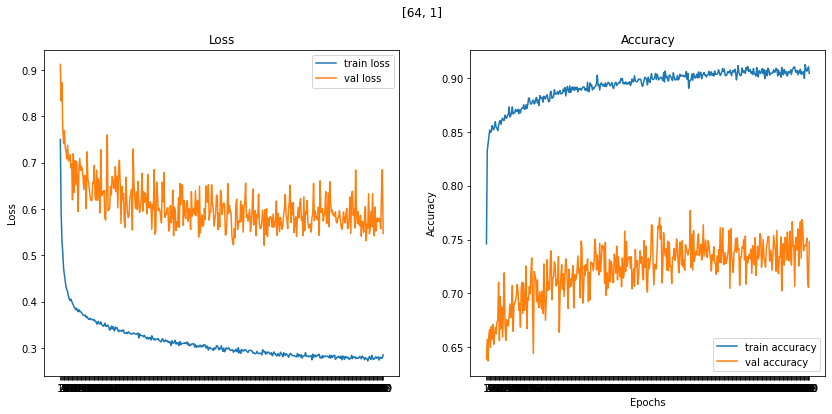

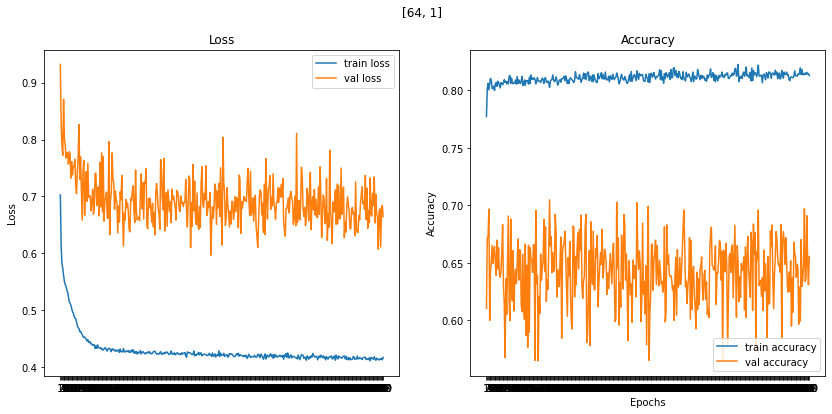

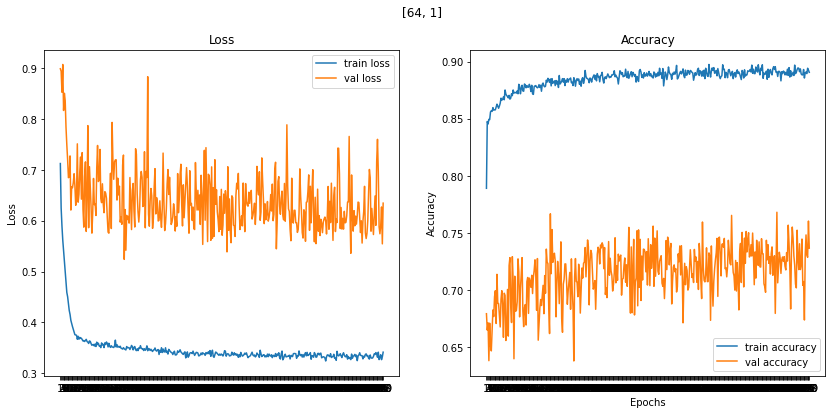

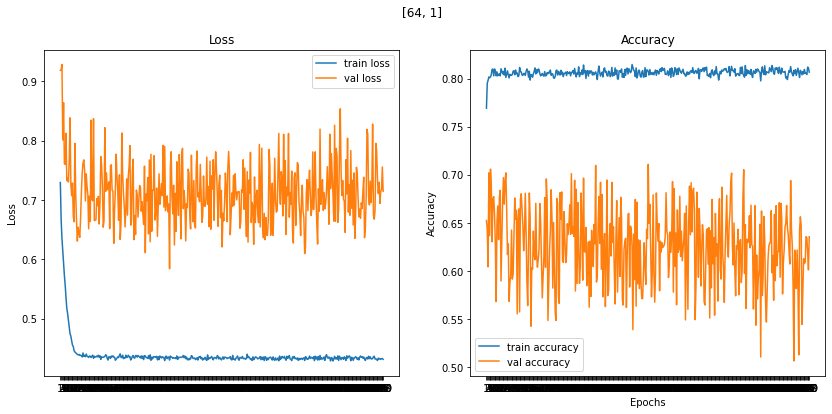

In [22]:
for history in global_history:
    plot_history(history['layers'], history['history'], legend=['train', 'val'])

In [23]:
for history in global_history:
    print(history['layers'], history['optimizer'])
    print('Neural Network:\n {}\n'.format(
        metrics.classification_report(history['prediction'], y_test)))
    print('Neural Network:\n {}\n'.format(
        metrics.confusion_matrix(history['prediction'], y_test)))

[64, 1] <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f4d4f3c0f10>
Neural Network:
               precision    recall  f1-score   support

         0.0       0.76      0.87      0.81      1335
         1.0       0.70      0.52      0.60       775

    accuracy                           0.74      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.74      0.74      0.73      2110


Neural Network:
 [[1163  172]
 [ 373  402]]

[64, 1] <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f4d4f3c0f10>
Neural Network:
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      1677
         1.0       0.51      0.68      0.59       433

    accuracy                           0.80      2110
   macro avg       0.71      0.76      0.73      2110
weighted avg       0.83      0.80      0.81      2110


Neural Network:
 [[1398  279]
 [ 138  295]]

[64, 1] <tensorflow.python.keras.optimizer_v2.gradient_d